# 0.2.0 - EDA: Name Statistics

**Overview**: This notebook is responsible for exploring the dataset.

**Actions**: This notebook performs the following actions:

- Perform EDA on the `name` feature.

**Dependencies**: This notebook depends on the following dependenc(y/ies):

- `data/interim/ecommerce_data-cleaned-0.1.4.csv`

**Targets**: This notebook outputs no artifact(s).

## Setup

The following cells import required libraries for python analysis, import the module path to access the project's `src/` module scripts, and enable autoreloading for the hot-reloading of source files outside of the notebook. These are all optional and should be included if needed for development.

In [1]:
# Enable hot-reloading of external scripts.
%load_ext autoreload
%autoreload 2

# Set project directory to project root.
from pathlib import Path
PROJECT_DIR = Path.cwd().resolve().parents[0]
%cd {PROJECT_DIR}

# Import utilities.
from src.data import *
from src.features import *

D:\Repositories\rit\ISTE780\Project


In [2]:
# Get the dependency.
input_filepath = get_interim_filepath("0.1.4", tag="cleaned")
df_input = pd.read_csv(input_filepath, index_col = 0)
df_input.info()
df_input.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29604 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         29041 non-null  object 
 1   name          29604 non-null  object 
 2   description   29552 non-null  object 
 3   category_1    29604 non-null  object 
 4   category_2    29604 non-null  object 
 5   category_3    29604 non-null  object 
 6   keywords      29604 non-null  object 
 7   price_raw     29604 non-null  float64
 8   discount_raw  29604 non-null  float64
 9   price_range   29604 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.5+ MB


,brand,name,description,category_1,category_2,category_3,keywords,price_raw,discount_raw,price_range
0,la cost,la costena chipotl pepper 7 oz pack 12,we aim show accur product inform manufactur su...,food,meal solut grain pasta,can good,can veget,31.93,31.93,"(25, 50]"
1,equat,equat triamcinolon acetonid nasal allergi spra...,we aim show accur product inform manufactur su...,health,equat,equat allergi,equat sinu congest nasal care,10.48,10.48,"(0, 25]"
2,adurosmart eria,adurosmart eria soft white smart a19 light bul...,we aim show accur product inform manufactur su...,electron,smart home,smart energi light,smart light smart light bulb,10.99,10.99,"(0, 25]"
3,lowrid,24 classic adjust balloon fender set chrome bi...,we aim show accur product inform manufactur su...,sport outdoor,bike,bike accessori,bike fender,38.59,38.59,"(25, 50]"
4,anself,eleph shape silicon drinkwar portabl silicon c...,we aim show accur product inform manufactur su...,babi,feed,sippi cup altern plastic,unknown,5.81,5.81,"(0, 25]"


We can see that $\approx \$70$ is the threshold for where values start to become outliers.

A vast majority ($n = 26325$) of the dataset is above $\$100$.

In [3]:
# Import plotting library.
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('ggplot')

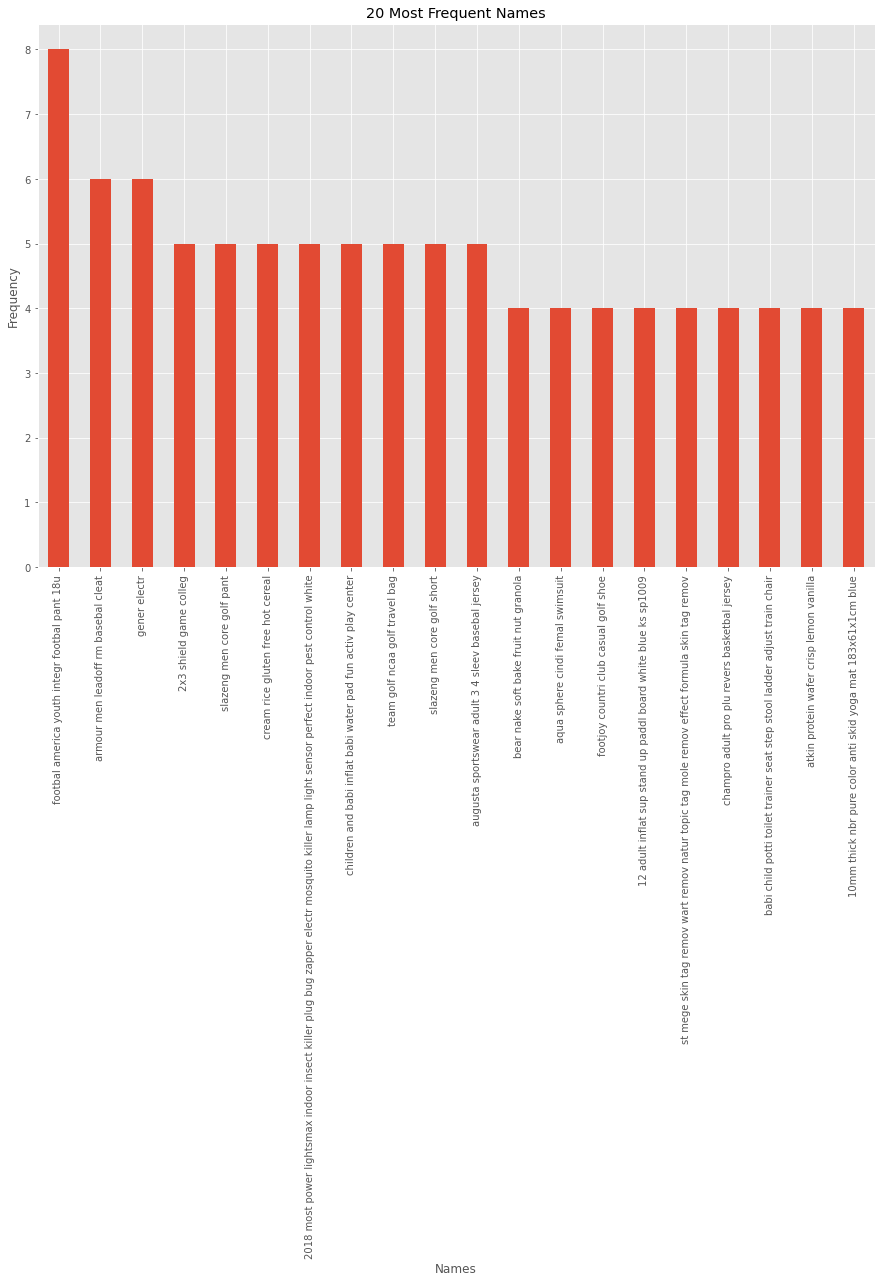

In [5]:
# Plot of 10 most common brands.
fig = plt.figure(figsize=(15,10))
ax = df_input.name.value_counts().nlargest(20).plot.bar(ylim=0)
ax.set_title("20 Most Frequent Names")
ax.set_xlabel("Names")
ax.set_ylabel("Frequency")
plt.show()

In [8]:
df_terms = df_input[["name"]]
display(df_terms)
term_frequency = df_terms.name.str.split(expand=True).stack().value_counts()
display(term_frequency)

,name
0,la costena chipotl pepper 7 oz pack 12
1,equat triamcinolon acetonid nasal allergi spra...
2,adurosmart eria soft white smart a19 light bul...
3,24 classic adjust balloon fender set chrome bi...
4,eleph shape silicon drinkwar portabl silicon c...
...,...
29994,sheng xiang zhen shengxiangzhen snack onenin c...
29996,shock sox fork seal guard 29 36mm fork tube 4 ...
29997,princ gooseberri 300g
29998,creat ion grace 3 4 inch straight hair iron ci...


oz           4892
pack         4614
2            3540
1            2943
3            2522
             ... 
bamba           1
costenita       1
slaplit         1
pinalen         1
2159            1
Length: 25129, dtype: int64

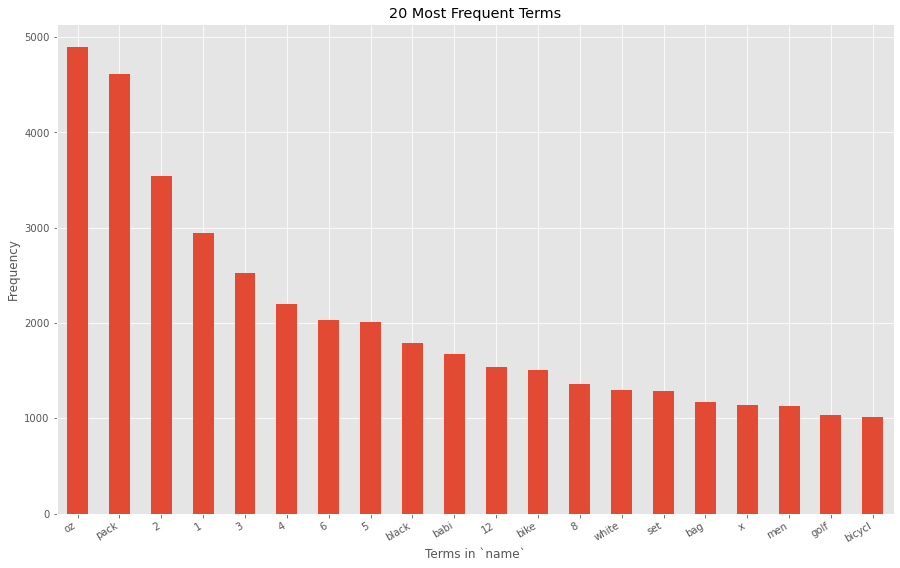

In [15]:
# Plot of 20 most common terms in the `name` feature.
fig = plt.figure(figsize=(15,10))
ax = df_terms.name.str.split(expand=True).stack().value_counts().nlargest(20).plot.bar(ylim=0)
ax.set_title("20 Most Frequent Terms")
ax.set_xlabel("Terms in `name`")
ax.set_ylabel("Frequency")
plt.gcf().autofmt_xdate()
plt.show()

                term  frequency
oz                oz       4892
pack            pack       4614
2                  2       3540
1                  1       2943
3                  3       2522
...              ...        ...
bamba          bamba          1
costenita  costenita          1
slaplit      slaplit          1
pinalen      pinalen          1
2159            2159          1

[25129 rows x 2 columns]


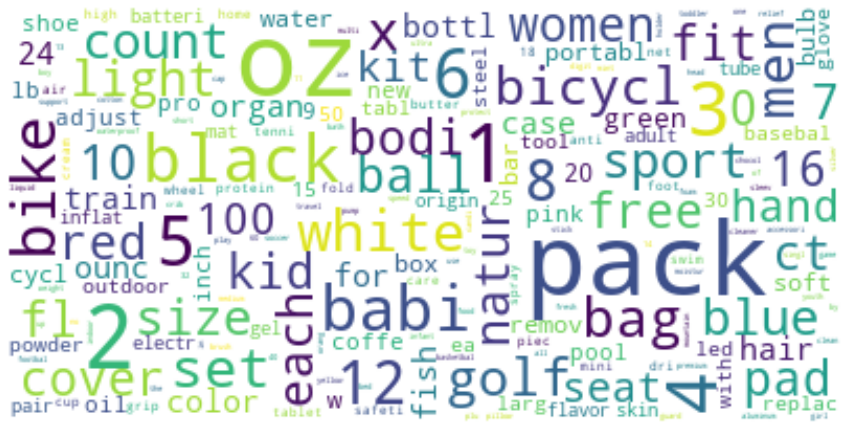

In [16]:
from wordcloud import WordCloud

frequency_terms = term_frequency.to_frame()
frequency_terms['term'] = frequency_terms.index
frequency_terms['frequency'] = frequency_terms[0]
frequency_terms = frequency_terms.iloc[: , 1:]
# frequency_terms.rename(columns={'0': 'frequency', 'term':'term'})
print(frequency_terms)

data = dict(zip(frequency_terms['term'].tolist(), frequency_terms['frequency'].tolist()))
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate_from_frequencies(data)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()